# Script Principal du projet 

 * Le fichier grid permet de faire l'ensemble du pre-processing. Il n'est pas détaillé ici. 
 
 * Les données sont sauvegardées dans le fichier storage, il faut une application comme db-browser pour le consulter et faire des requêtes dessus. 
 
 * Le fichier tkteach nous a permis de faire la labelisation
 
 Pour plus d'information, lire le README
 
 Ce projet se veut exploratoire, nous avons exploré certaines pistes et tenter de répondre à notre problématique de départ. 
 

Commençons par importer les packages nécessaires

In [20]:
#### Librairie
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
#### Nos fonctions : 
    
from utils import *
from db_config import *

#### Nos fonctions par modèle
from KNN import KNN_Model
from RF import RandomForest_Model
from Linear_SVC import SVC_Model
from neural_network import NN_Model

ModuleNotFoundError: No module named 'keras'

# Premiers test avec le data set complet
On retire les deux dernières colonnes qui sont un doublon des espaces dans notre base de données et l'apostrophe
pour lequel il n'y a qu'une seule donnée.

In [2]:
all_categories = [el for el in selectAllCategories()][0:-2]

x_all, y_all = createDataSet(all_categories)

print(x_all.shape)
print(y_all.shape)


(3733, 784)
(3733,)


## Création des dataset train et test

Les jeux de données split ne sont pas utilisés dans un premier temps, puisque le split est effectué dans chaque fonction du modèle testé (cf script de chaque modèle). La ligne suivante permet simplement d'avoir un aperçu des données avec lesquelles travailent les fonctions. 

X_train_all : (2501, 784)
X_test_all : (1232, 784)
y_train_all : (2501,)
y_test_all : (1232,)


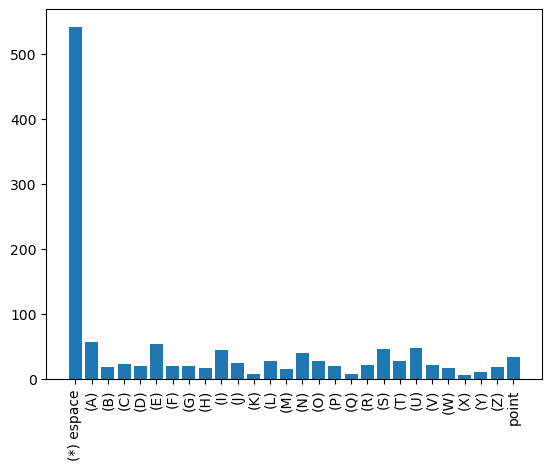

In [3]:

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=0.33,
                                                                    random_state=2, shuffle=True)

print("X_train_all :", X_train_all.shape)
print("X_test_all :", X_test_all.shape)
print("y_train_all :", y_train_all.shape)
print("y_test_all :", y_test_all.shape)

plotNumberOfOccurenciesByClasses(y_test_all)

## Résultats obtenus pour les différents modèles
Toutes les fonctions d'entraînement des modèles font de la cross-validation et le cas 
échéant estiment les hyper-paramètres et retournent le meilleur modèle. 

Pour chaque fonction, un split est réalisé, de manière à ce que l'estimation des modèles ne se fasse pas sur l'ensemble du dataset. 

Pour chaque fonction, la matrice de confusion globale est affichée à la fin du processus de cross-validation. Toutes les étapes sont printées ce qui nous permet d'avoir une idée de l'état d'avancement. 

Chaque fonction retourne le meilleur modèle, optimisé après cross-validation.

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.542584860557769
---
---
accuracy moyenne pour k = 2: 0.5193960159362551
---
---
accuracy moyenne pour k = 3: 0.520199203187251
---
---
accuracy moyenne pour k = 4: 0.5181992031872511
---
---
accuracy moyenne pour k = 5: 0.513399203187251
---
---
accuracy moyenne pour k = 6: 0.5110023904382469
---
---
accuracy moyenne pour k = 7: 0.503403984063745
---
---
accuracy moyenne pour k = 8: 0.501405577689243
---
---
accuracy moyenne pour k = 9: 0.4954103585657371
---
---
accuracy moyenne pour k = 10: 0.49380717131474106
---
---
accuracy moyenne pour k = 11: 0.49380398406374504
---
---
accuracy moyenne pour k = 12: 0.493802390438247
---
---
accuracy moyenne pour k = 13: 0.48860398406374494
---
---
accuracy moyenne pour k = 14: 0.48380557768924304
---
---
accuracy moyenne pour k = 15: 0.4830103585657371
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


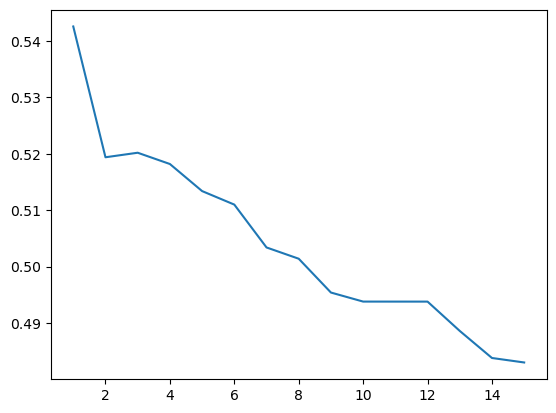

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


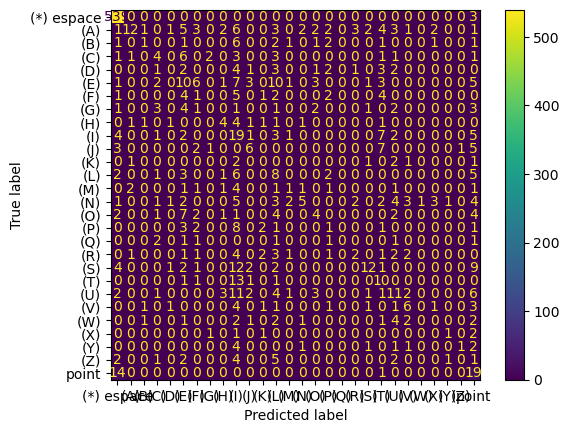

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 3 et depth = 2 ---
0.4546179640718563
---
---
--- accuracy moyenne pour split = 3 et depth = 3 ---
0.4562171656686627
---
---
--- accuracy moyenne pour split = 3 et depth = 4 ---
0.46221636726546905
---
---
--- accuracy moyenne pour split = 4 et depth = 2 ---
0.45261956087824357
---
---
--- accuracy moyenne pour split = 4 et depth = 3 ---
0.4570171656686627
---
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.4638155688622755
---
---
--- accuracy moyenne pour split = 5 et depth = 2 ---
0.4542179640718563
---
---
--- accuracy moyenne pour split = 5 et depth = 3 ---
0.45821716566866266
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.46101636726546913
---
--- cross validation terminée ---
--- La meilleur accuracy est 0.4638155688622755 --- 
 Pour split = 4 et depth = 4


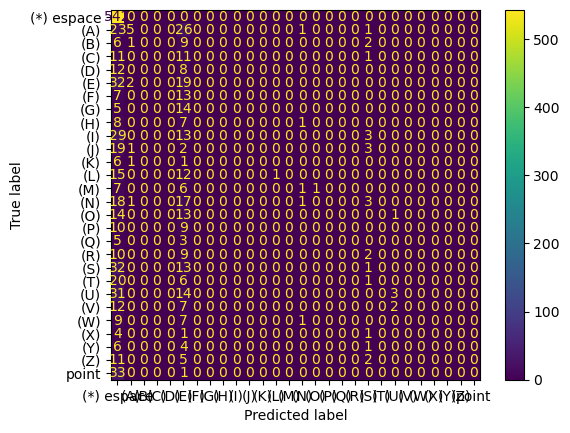

---  Cross Validation : Optimisation des hyperparamètres avec GridCV --- 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   1.0s
[CV] END ................................C=1, kernel=sig

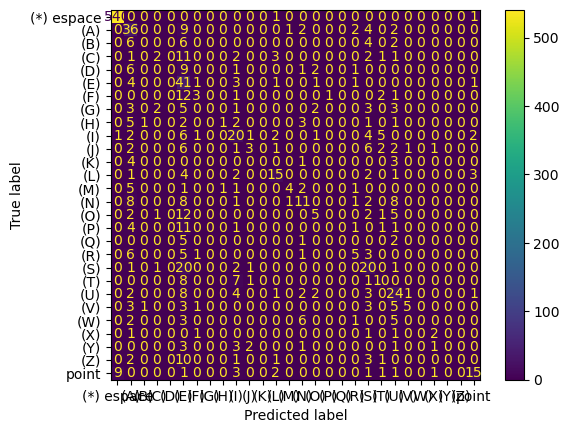

 Score Accuracy pour le meilleur modèle 
0.6185064935064936


In [4]:
best_knn_model = KNN_Model(x_all, y_all, 10, 15, 'accuracy')

best_random_forest_model = RandomForest_Model(x_all, y_all, nbreTree=100, 
                                              minDepth=2, maxDepth=4, minSplit=3,
                                              maxSplit=5, nbreCV=5, metric= "accuracy")

best_SVC_model = SVC_Model(x_all,y_all, nbreCV = 5 , C_min=1,nb_C =2)


## Matrice de confusion pour chaque catégorie de lettre, par modèle

La fonction testModelForEachCat nous permet d'afficher l'accuracy pour chaque catégorie de lettre, nous l'utilisons régulièrement dans notre projet afin de savoir quelles lettres sont plus ou moins bien prédites.

Si plot=True, alors la fonction affiche toutes les matrices de confusions pour chaque catégorie de lettre.

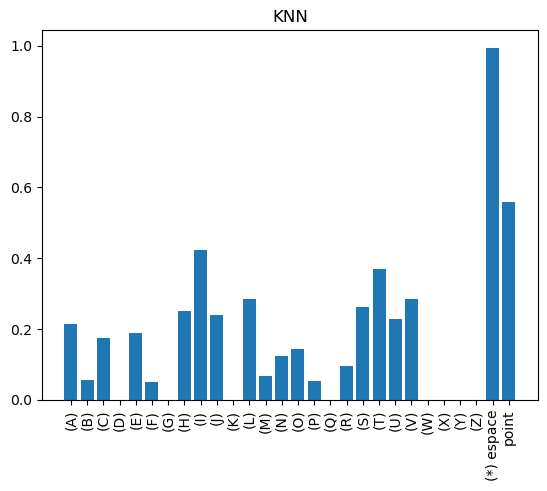

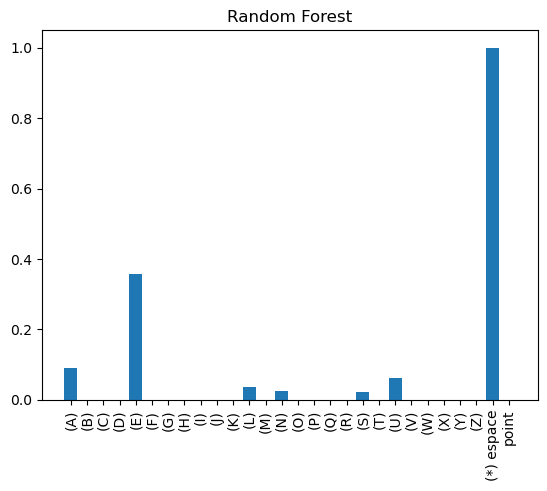

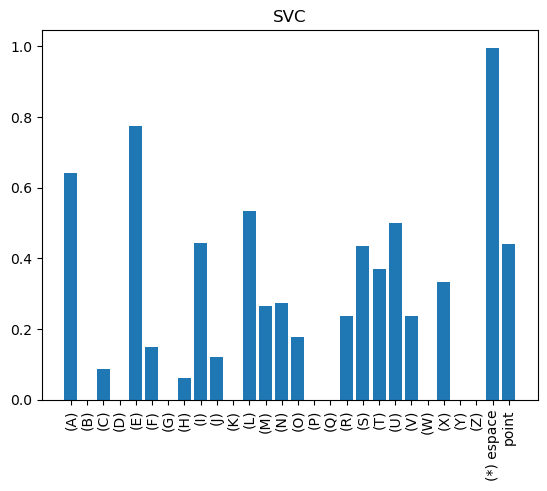

{"(1, '(A)')": 0.6428571428571429,
 "(2, '(B)')": 0.0,
 "(3, '(C)')": 0.08695652173913043,
 "(4, '(D)')": 0.0,
 "(5, '(E)')": 0.7735849056603774,
 "(6, '(F)')": 0.15,
 "(7, '(G)')": 0.0,
 "(8, '(H)')": 0.0625,
 "(9, '(I)')": 0.4444444444444444,
 "(10, '(J)')": 0.12,
 "(11, '(K)')": 0.0,
 "(12, '(L)')": 0.5357142857142857,
 "(13, '(M)')": 0.26666666666666666,
 "(14, '(N)')": 0.275,
 "(15, '(O)')": 0.17857142857142858,
 "(16, '(P)')": 0.0,
 "(17, '(Q)')": 0.0,
 "(18, '(R)')": 0.23809523809523808,
 "(19, '(S)')": 0.43478260869565216,
 "(20, '(T)')": 0.37037037037037035,
 "(21, '(U)')": 0.5,
 "(22, '(V)')": 0.23809523809523808,
 "(23, '(W)')": 0.0,
 "(24, '(X)')": 0.3333333333333333,
 "(25, '(Y)')": 0.0,
 "(26, '(Z)')": 0.0,
 "(27, '(*) espace')": 0.996309963099631,
 "(28, 'point')": 0.4411764705882353}

In [5]:
testModelForEachCat(best_knn_model, all_categories, y_test_all, X_test_all, title="KNN", plot=False)

testModelForEachCat(best_random_forest_model, all_categories, y_test_all, X_test_all, title="Random Forest", plot=False)

testModelForEachCat(best_SVC_model, all_categories, y_test_all, X_test_all, title="SVC", plot=False)


 Premières conclusions : 
    
   Quelque soit le modèle et quelques soit les hyper paramètres, on a la même accuracy
   Quand on regarde plus en détail, toutes les lettres sont très souvent prédites comme étant des espaces. 
   Problème de déséquilibre des classes. 
   
   Si on regarde un peu plus finement pour les KNN, on peut constater que les lettres les moins présentes dans le jeu de données telles que W, X, Z ne sont jamais prédites. La lettre la mieux prédite et la lettre I. 
   
   Nous avons testé le random forest avec une profondeur comprise entre 2 et 4 dans un premier temps afin de voir comment se comportait le modèle avec les données de bases, ce qui explique ses très mauvais résultats. Nous verrons par la suite que la profondeur a un rôle important. 
    
   Deux stratégies s'offrent à nous : 
    
- Ré-équilibrer les données artificiellement
- Augmenter le nombre de données (en récolter plus)
    
Dans le cadre du projet, la dernière option qui est très certainement la meilleure, n'est pas possible. 
Nous essaierons donc la première stratégie. 
    
Nous avons plusieurs solutions pour réaliser cette dernière  :
- Réduction des données à la main        
- Oversampling
- undersampling
- class weight 
- decision threshold (ne fonctionne que pour du binaire à priori)
        
    
Dans un premier temps, au regard de nos données, nous allons réduire manuellement le nombre d'espace. 
C'est une décision forte, mais qui semble nécessaire au regard de la différence d'espace par rapport 
aux autres classes.

# Données avec un nombre d'espace réduit

In [6]:
x_cut_space, y_cut_space = createDataSet(all_categories, troncSpace=1000)

# Modèles avec un nombre d'espace réduit

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.4544396393080604
---
---
accuracy moyenne pour k = 2: 0.44002576370997426
---
---
accuracy moyenne pour k = 3: 0.4376265182186234
---
---
accuracy moyenne pour k = 4: 0.4299526131762974
---
---
accuracy moyenne pour k = 5: 0.42754876702245126
---
---
accuracy moyenne pour k = 6: 0.4174733161575267
---
---
accuracy moyenne pour k = 7: 0.4117178873757822
---
---
accuracy moyenne pour k = 8: 0.4064386271623114
---
---
accuracy moyenne pour k = 9: 0.39923859035701137
---
---
accuracy moyenne pour k = 10: 0.39588010673536994
---
---
accuracy moyenne pour k = 11: 0.39347856091277145
---
---
accuracy moyenne pour k = 12: 0.3925239234449761
---
---
accuracy moyenne pour k = 13: 0.38916083916083916
---
---
accuracy moyenne pour k = 14: 0.38868697092381305
---
---
accuracy moyenne pour k = 15: 0.3848523187338977
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


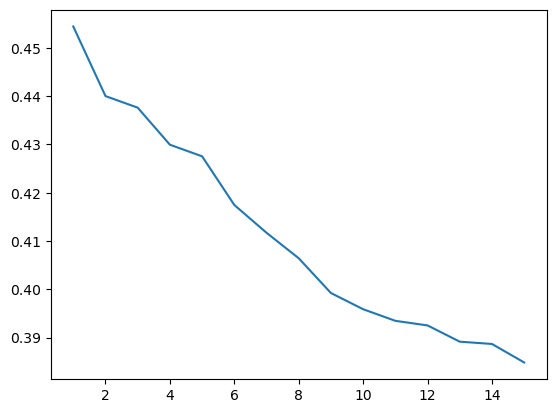

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


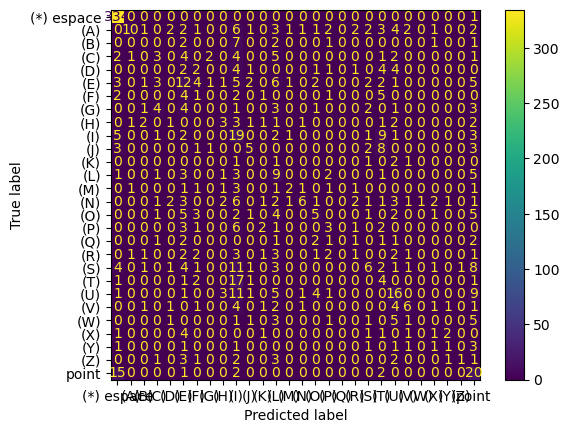

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 3 et depth = 2 ---
0.34788899649511157
---
---
--- accuracy moyenne pour split = 3 et depth = 3 ---
0.35124861649142225
---
---
--- accuracy moyenne pour split = 3 et depth = 4 ---
0.36084324847814053
---
---
--- accuracy moyenne pour split = 3 et depth = 5 ---
0.37763673676443454
---
---
--- accuracy moyenne pour split = 3 et depth = 6 ---
0.3939609850581074
---
---
--- accuracy moyenne pour split = 3 et depth = 7 ---
0.40787677550267476
---
---
--- accuracy moyenne pour split = 3 et depth = 8 ---
0.4299391256225788
---
---
--- accuracy moyenne pour split = 3 et depth = 9 ---
0.45009338682899835
---
---
--- accuracy moyenne pour split = 3 et depth = 10 ---
0.44960915882678476
---
---
--- accuracy moyenne pour split = 4 et depth = 2 ---
0.34836976572588074
---
---
--- accuracy moyenne pour split = 4 et depth = 3 ---
0.35124746356760744
---
---
--- accuracy moy

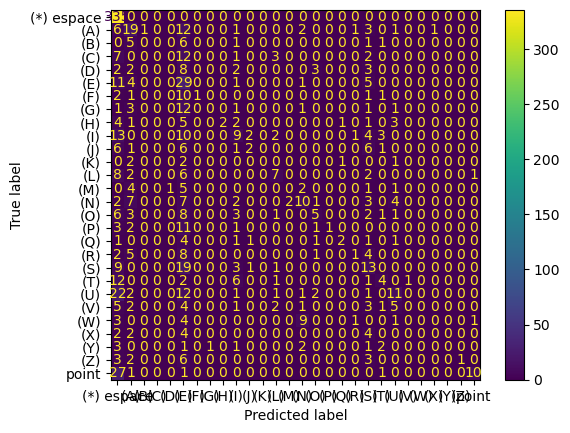

In [26]:


best_knn_model_cut_space = KNN_Model(x_cut_space, y_cut_space, 10, 15, 'accuracy')

best_random_forest_model_cut_space = RandomForest_Model(x_cut_space, y_cut_space, 
                                                        nbreTree=100, minDepth=2, maxDepth=10,
                                                        minSplit=3, maxSplit=5, nbreCV=5, metric= "accuracy")
#best_SVC_model_cut_space = SVC_Model(x_cut_space, y_cut_space, nbreCV = 5 , C_min=1 ,nb_C =2)


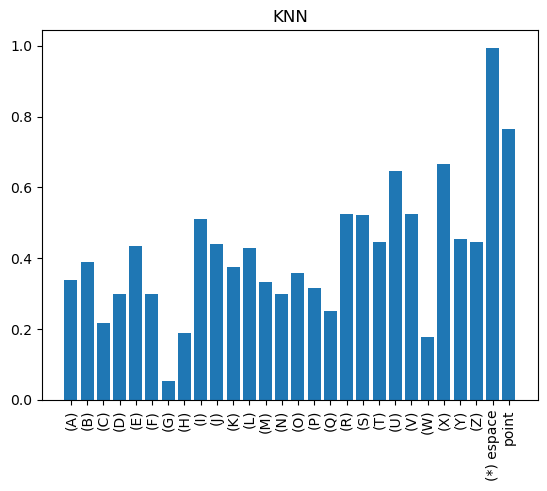

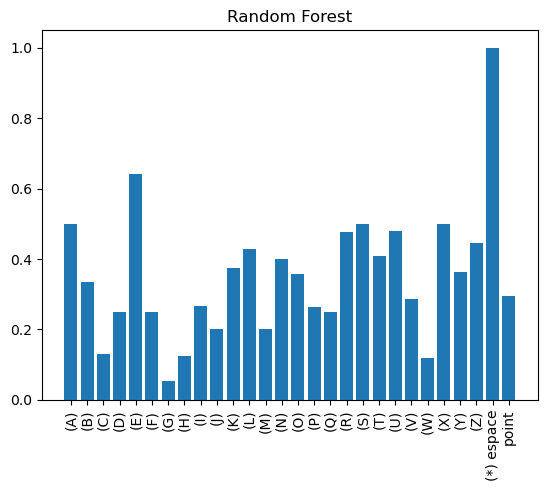

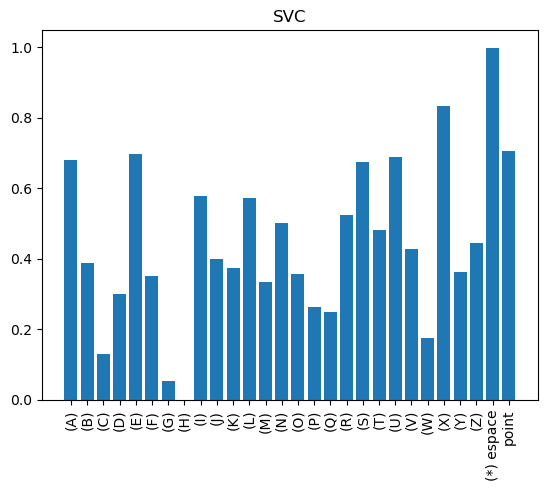

{"(1, '(A)')": 0.6785714285714286,
 "(2, '(B)')": 0.3888888888888889,
 "(3, '(C)')": 0.13043478260869565,
 "(4, '(D)')": 0.3,
 "(5, '(E)')": 0.6981132075471698,
 "(6, '(F)')": 0.35,
 "(7, '(G)')": 0.05263157894736842,
 "(8, '(H)')": 0.0,
 "(9, '(I)')": 0.5777777777777777,
 "(10, '(J)')": 0.4,
 "(11, '(K)')": 0.375,
 "(12, '(L)')": 0.5714285714285714,
 "(13, '(M)')": 0.3333333333333333,
 "(14, '(N)')": 0.5,
 "(15, '(O)')": 0.35714285714285715,
 "(16, '(P)')": 0.2631578947368421,
 "(17, '(Q)')": 0.25,
 "(18, '(R)')": 0.5238095238095238,
 "(19, '(S)')": 0.6739130434782609,
 "(20, '(T)')": 0.48148148148148145,
 "(21, '(U)')": 0.6875,
 "(22, '(V)')": 0.42857142857142855,
 "(23, '(W)')": 0.17647058823529413,
 "(24, '(X)')": 0.8333333333333334,
 "(25, '(Y)')": 0.36363636363636365,
 "(26, '(Z)')": 0.4444444444444444,
 "(27, '(*) espace')": 0.9981549815498155,
 "(28, 'point')": 0.7058823529411765}

In [27]:
testModelForEachCat(best_knn_model_cut_space, all_categories, y_test_all, X_test_all, title="KNN", plot=False)

testModelForEachCat(best_random_forest_model_cut_space, all_categories, y_test_all, X_test_all, title="Random Forest", plot=False)

testModelForEachCat(best_SVC_model_cut_space, all_categories, y_test_all, X_test_all, title="SVC", plot=False)

Conclusions, 
Les modèles prédisent mieux chacune des lettres. Aucune lettre n'est jamais prédite
On peut constater qu'avec une profondeur de 10, quelque soit le nombre de split, le Random Forest prédit également toutes les lettres. 

On peut également constater que selon les modèles ce ne sont pas du tout les mêmes lettres qui sont bien ou mal prédites. 

Ce premier travail manuel sur le ré-équilibrage des classes nous pousse à essayer de réaliser un resampling avec une fonction prévue pour. 

# Test de ressampling avec SMOTEENN

In [9]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
x_resampled, y_resampled = smote_enn.fit_resample(x_all, y_all)

# Modèles avec les données resamplées

In [10]:
## Ne pas exécuter cette cellule ##

#best_knn_model_resample = KNN_Model(x_resampled, y_resampled, nbre_cv=10, k_max= 5, metric = 'accuracy')

#best_random_forest_model_resample = RandomForest_Model(x_resampled, y_resampled, 
  #                                                     nbreTree=100, minDepth=2, maxDepth=4, 
   #                                                    minSplit=3, maxSplit=5, nbreCV=5, metric= "accuracy")
#best_svc_model_resample =  SVC_Model(x_resampled, y_resampled, nbreCV = 5 , C_min=1 ,nb_C =2)


Temps de calcul très long pour les modèles, car nombre de données beaucoup trop grand

Essayons avec un nombre d'espace réduit, pour avoir un jeu de données plus petit (environ 1000 données par catégories maximum maximum)

x_resampled_cut_space : (25073, 784)
y_resampled_cut_space : (25073,)


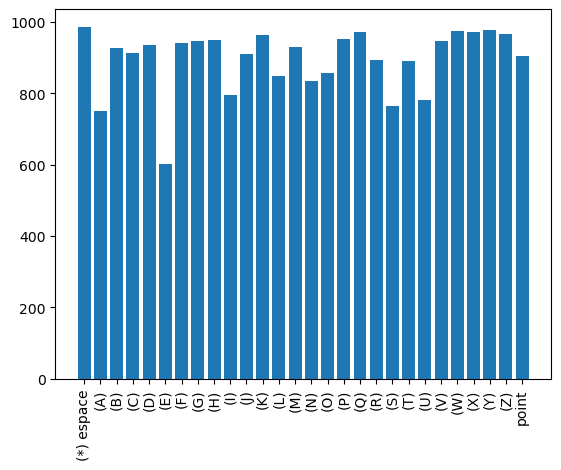

In [11]:
from imblearn.combine import SMOTEENN
smote_enn_cut_space = SMOTEENN(random_state=0)
x_resampled_cut_space, y_resampled_cut_space = smote_enn_cut_space.fit_resample(x_cut_space, y_cut_space)

print("x_resampled_cut_space :", x_resampled_cut_space.shape)
print("y_resampled_cut_space :", y_resampled_cut_space.shape)

# mettre le fonction "plotNumberOfOccurenciesByClasses" pour afficher la proportion des lettres
plotNumberOfOccurenciesByClasses(y_resampled_cut_space)

Ce resampling nous permet d'avoir une répartition des classes plus homogènes. Dans un premier temps, nous avons resamplé l'ensemble des du dataset. 

## Test des modèles avec train et test resamplé. 

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.9876773306106242
---
---
accuracy moyenne pour k = 2: 0.9735088204430073
---
---
accuracy moyenne pour k = 3: 0.9630912320258659
---
---
accuracy moyenne pour k = 4: 0.9483273419552456
---
---
accuracy moyenne pour k = 5: 0.9348729402422077
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


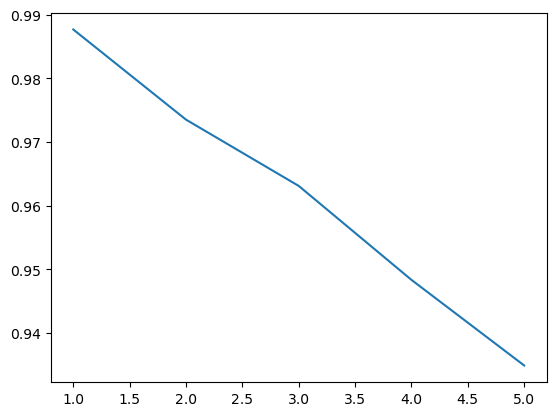

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


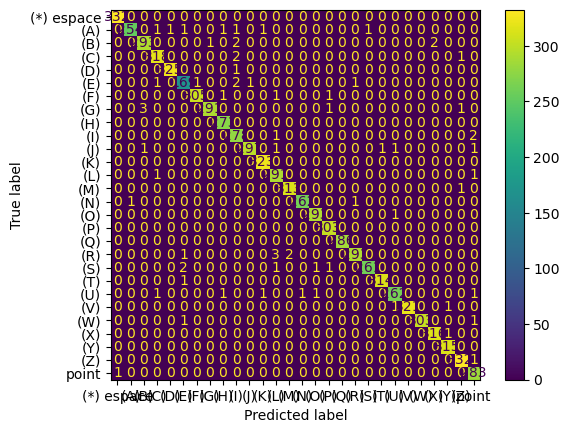

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 3 et depth = 2 ---
0.22806190547073252
---
---
--- accuracy moyenne pour split = 3 et depth = 3 ---
0.34516069124881266
---
---
--- accuracy moyenne pour split = 3 et depth = 4 ---
0.42760977969633823
---
---
--- accuracy moyenne pour split = 4 et depth = 2 ---
0.23895556004479795
---
---
--- accuracy moyenne pour split = 4 et depth = 3 ---
0.3393264364394165
---
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.4290387941422476
---
---
--- accuracy moyenne pour split = 5 et depth = 2 ---
0.24127890245112632
---
---
--- accuracy moyenne pour split = 5 et depth = 3 ---
0.3405160974779909
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.42570530132267254
---
--- cross validation terminée ---
--- La meilleur accuracy est 0.4290387941422476 --- 
 Pour split = 4 et depth = 4


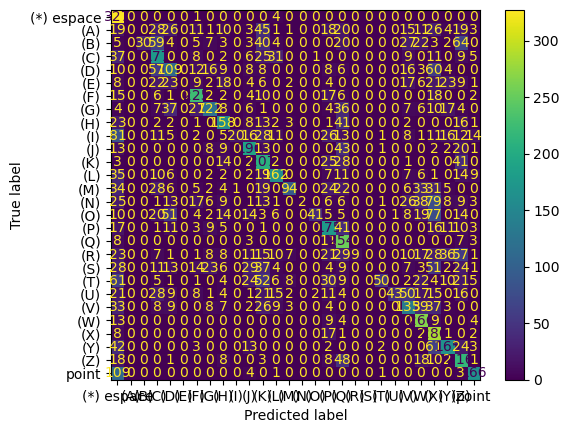

---  Cross Validation : Optimisation des hyperparamètres avec GridCV --- 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time= 1.3min
[CV] END ....................................C=1, kernel=rbf; total time= 1.3min
[CV] END ....................................C=1, kernel=rbf; total time= 1.3min
[CV] END ....................................C=1, kernel=rbf; total time= 1.3min
[CV] END ....................................C=1, kernel=rbf; total time= 1.3min
[CV] END ...................................C=1, kernel=poly; total time=  32.7s
[CV] END ...................................C=1, kernel=poly; total time=  32.9s
[CV] END ...................................C=1, kernel=poly; total time=  33.6s
[CV] END ...................................C=1, kernel=poly; total time=  33.4s
[CV] END ...................................C=1, kernel=poly; total time=  35.1s
[CV] END ................................C=1, kernel=sig

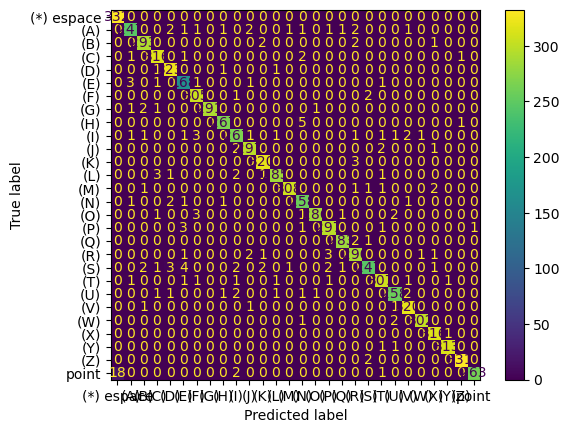

 Score Accuracy pour le meilleur modèle 
0.9776435045317221


In [12]:

best_knn_model_resample = KNN_Model(x_resampled_cut_space, y_resampled_cut_space, 
                                    nbre_cv=10, k_max= 5, metric = 'accuracy')

best_random_forest_model_resample = RandomForest_Model(x_resampled_cut_space, y_resampled_cut_space, 
                                                       nbreTree=100, minDepth=2, maxDepth=4, minSplit=3,
                                                       maxSplit=5, nbreCV=5, metric= "accuracy")

best_svc_model_resample = SVC_Model(x_resampled_cut_space, y_resampled_cut_space, 
                                    nbreCV = 5 , C_min=1,nb_C =2)


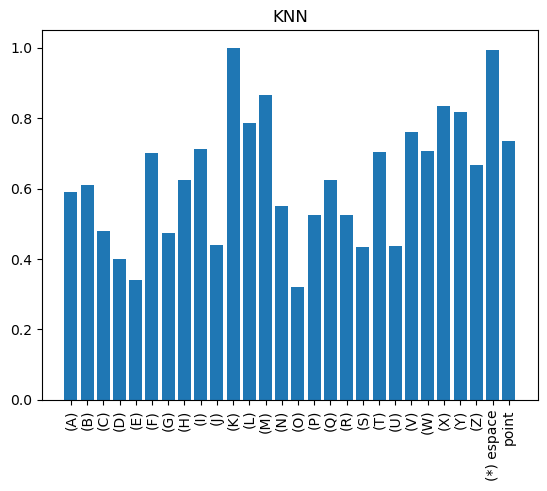

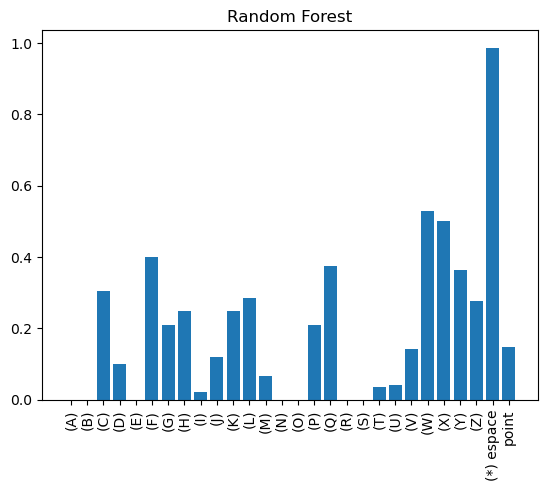

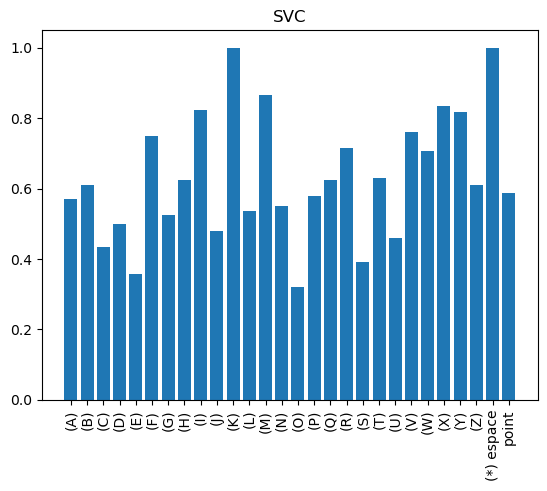

{"(1, '(A)')": 0.5714285714285714,
 "(2, '(B)')": 0.6111111111111112,
 "(3, '(C)')": 0.43478260869565216,
 "(4, '(D)')": 0.5,
 "(5, '(E)')": 0.3584905660377358,
 "(6, '(F)')": 0.75,
 "(7, '(G)')": 0.5263157894736842,
 "(8, '(H)')": 0.625,
 "(9, '(I)')": 0.8222222222222222,
 "(10, '(J)')": 0.48,
 "(11, '(K)')": 1.0,
 "(12, '(L)')": 0.5357142857142857,
 "(13, '(M)')": 0.8666666666666667,
 "(14, '(N)')": 0.55,
 "(15, '(O)')": 0.32142857142857145,
 "(16, '(P)')": 0.5789473684210527,
 "(17, '(Q)')": 0.625,
 "(18, '(R)')": 0.7142857142857143,
 "(19, '(S)')": 0.391304347826087,
 "(20, '(T)')": 0.6296296296296297,
 "(21, '(U)')": 0.4583333333333333,
 "(22, '(V)')": 0.7619047619047619,
 "(23, '(W)')": 0.7058823529411765,
 "(24, '(X)')": 0.8333333333333334,
 "(25, '(Y)')": 0.8181818181818182,
 "(26, '(Z)')": 0.6111111111111112,
 "(27, '(*) espace')": 0.9981549815498155,
 "(28, 'point')": 0.5882352941176471}

In [13]:
testModelForEachCat(best_knn_model_resample, all_categories, y_test_all, X_test_all, title="KNN", plot=False)

testModelForEachCat(best_random_forest_model_resample, all_categories, y_test_all, X_test_all, title="Random Forest", plot=False)

testModelForEachCat(best_svc_model_resample, all_categories, y_test_all, X_test_all, title="SVC", plot=False)

### Première conclusion resampling

Les accuracy rendues par nos modèles sont très très bonnes, prochent des 95% ce qui nous a questionné. Nous nous sommes rendus compte qu'il vallait mieux faire un resampling sur le data set train et faire les prédictions sur le data set test qui lui ne doit pas être re samplé. 

### Meilleure optimisation du random Forest

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.4262402713392592
---
---
--- accuracy moyenne pour split = 4 et depth = 5 ---
0.5103573200640781
---
---
--- accuracy moyenne pour split = 4 et depth = 6 ---
0.619893994811381
---
---
--- accuracy moyenne pour split = 4 et depth = 7 ---
0.7256224039183998
---
---
--- accuracy moyenne pour split = 4 et depth = 8 ---
0.8111686620167567
---
---
--- accuracy moyenne pour split = 4 et depth = 9 ---
0.8683173669884745
---
---
--- accuracy moyenne pour split = 4 et depth = 10 ---
0.9105252236351522
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.43231267454883116
---
---
--- accuracy moyenne pour split = 5 et depth = 5 ---
0.5066076213158679
---
---
--- accuracy moyenne pour split = 5 et depth = 6 ---
0.6138828165979103
---
---
--- accuracy moyenne pour split = 5 et depth = 7 ---
0.7313365301464437
---
---
--- accuracy moyenne pour

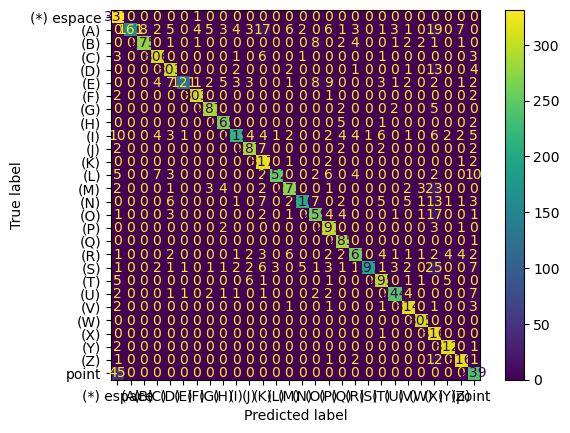

In [14]:
rf_model = RandomForest_Model(x_resampled_cut_space, y_resampled_cut_space,
                              nbreTree=100, minDepth=4, maxDepth=10, minSplit=4, 
                              maxSplit=5, nbreCV=5, metric= "accuracy")


## Train resamplé et test non resamplé
Les très bonnes accuracy obtenue précédemment sont en fait trompeuse, en effet l'ensemble du dataset a été resamplé. Il semble plus juste de ne ressamplé que les données train et de faire les prédictions sur des données tests qui elles n'ont pas été resamplé. 

In [15]:
X_train_not_resampled, X_test_not_resampled, y_train_not_resampled, y_test_not_resampled = train_test_split(x_cut_space, y_cut_space, test_size=0.33, random_state=2, shuffle=True)


smote_enn_test_not_resampled = SMOTEENN(random_state=0)
x_train_resampled, y_train_resampled = smote_enn_test_not_resampled.fit_resample(X_train_not_resampled, y_train_not_resampled)

### KNN

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.9885990225443371
---
---
accuracy moyenne pour k = 2: 0.9720306887427519
---
---
accuracy moyenne pour k = 3: 0.9619653398475881
---
---
accuracy moyenne pour k = 4: 0.9473576316303255
---
---
accuracy moyenne pour k = 5: 0.9350656266716191
---
---
accuracy moyenne pour k = 6: 0.9182317385790227
---
---
accuracy moyenne pour k = 7: 0.9038915687703074
---
---
accuracy moyenne pour k = 8: 0.8874133932695558
---
---
accuracy moyenne pour k = 9: 0.8753892441782023
---
---
accuracy moyenne pour k = 10: 0.8645225498926195
---
---
accuracy moyenne pour k = 11: 0.8537451408961545
---
---
accuracy moyenne pour k = 12: 0.8406515524529249
---
---
accuracy moyenne pour k = 13: 0.8298739053623555
---
---
accuracy moyenne pour k = 14: 0.8211443437570931
---
---
accuracy moyenne pour k = 15: 0.8110794710501379
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


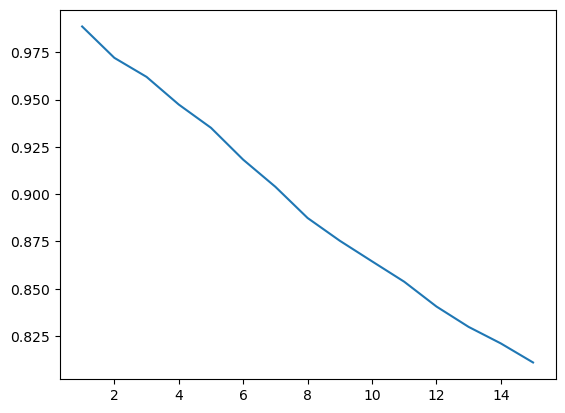

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


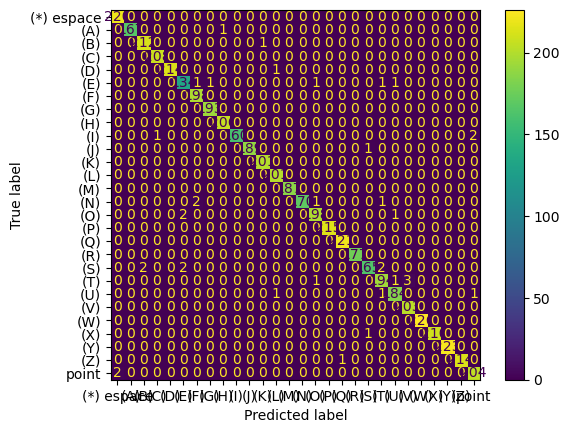

0.42843232716650437


In [16]:

knn_resample = KNN_Model(x_train_resampled, y_train_resampled, nbre_cv=10, k_max= 15, metric = 'accuracy')

predictions_not_resample_knn = knn_resample.predict(X_test_not_resampled)   

accuracy_not_resample_knn = accuracy_score(y_test_not_resampled, predictions_not_resample_knn)

print(accuracy_not_resample_knn)


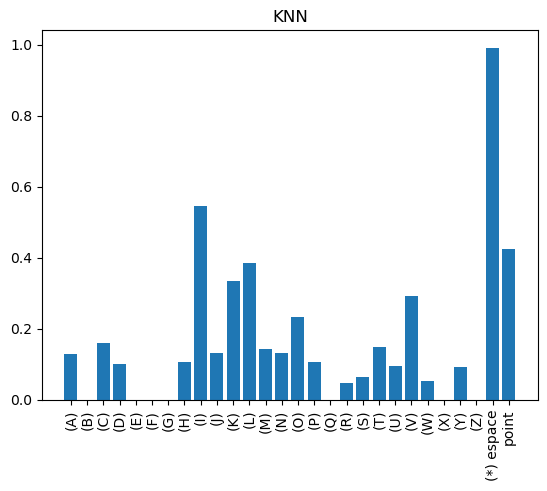

{"(1, '(A)')": 0.1276595744680851,
 "(2, '(B)')": 0.0,
 "(3, '(C)')": 0.16,
 "(4, '(D)')": 0.1,
 "(5, '(E)')": 0.0,
 "(6, '(F)')": 0.0,
 "(7, '(G)')": 0.0,
 "(8, '(H)')": 0.10526315789473684,
 "(9, '(I)')": 0.5454545454545454,
 "(10, '(J)')": 0.13043478260869565,
 "(11, '(K)')": 0.3333333333333333,
 "(12, '(L)')": 0.38461538461538464,
 "(13, '(M)')": 0.14285714285714285,
 "(14, '(N)')": 0.13157894736842105,
 "(15, '(O)')": 0.23333333333333334,
 "(16, '(P)')": 0.10526315789473684,
 "(17, '(Q)')": 0.0,
 "(18, '(R)')": 0.047619047619047616,
 "(19, '(S)')": 0.06521739130434782,
 "(20, '(T)')": 0.14814814814814814,
 "(21, '(U)')": 0.09433962264150944,
 "(22, '(V)')": 0.2916666666666667,
 "(23, '(W)')": 0.05263157894736842,
 "(24, '(X)')": 0.0,
 "(25, '(Y)')": 0.09090909090909091,
 "(26, '(Z)')": 0.0,
 "(27, '(*) espace')": 0.991044776119403,
 "(28, 'point')": 0.425}

In [21]:
testModelForEachCat(knn_resample, all_categories, y_test_not_resampled, X_test_not_resampled, title="KNN", plot=False)

### RF

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.49158180740023844
---
---
--- accuracy moyenne pour split = 4 et depth = 5 ---
0.5836819527712717
---
---
--- accuracy moyenne pour split = 4 et depth = 6 ---
0.7028593867444624
---
---
--- accuracy moyenne pour split = 4 et depth = 7 ---
0.8069826090233168
---
---
--- accuracy moyenne pour split = 4 et depth = 8 ---
0.8727168517354287
---
---
--- accuracy moyenne pour split = 4 et depth = 9 ---
0.9142244663613809
---
---
--- accuracy moyenne pour split = 4 et depth = 10 ---
0.941123581244162
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.4976397535237106
---
---
--- accuracy moyenne pour split = 5 et depth = 5 ---
0.5880466535905455
---
---
--- accuracy moyenne pour split = 5 et depth = 6 ---
0.7032162894886629
---
---
--- accuracy moyenne pour split = 5 et depth = 7 ---
0.808408990395199
---
---
--- accuracy moyenne pour 

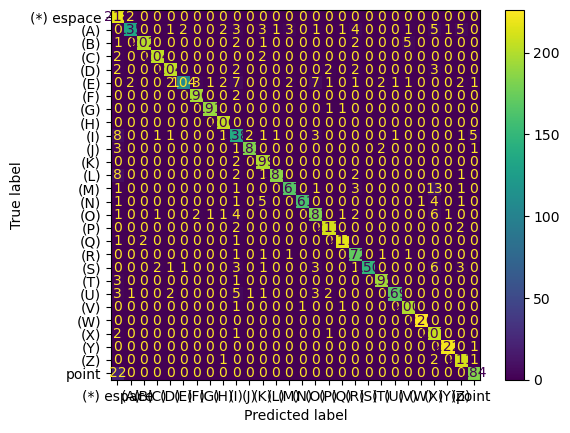

0.41382667964946446


In [17]:

rf_resample =  RandomForest_Model(x_train_resampled, y_train_resampled, nbreTree=100, minDepth=4, maxDepth=10, minSplit=4, maxSplit=5, nbreCV=5, metric= "accuracy")

predictions_not_resample = rf_resample.predict(X_test_not_resampled)   

accuracy_not_resample = accuracy_score(y_test_not_resampled, predictions_not_resample)

print(accuracy_not_resample)


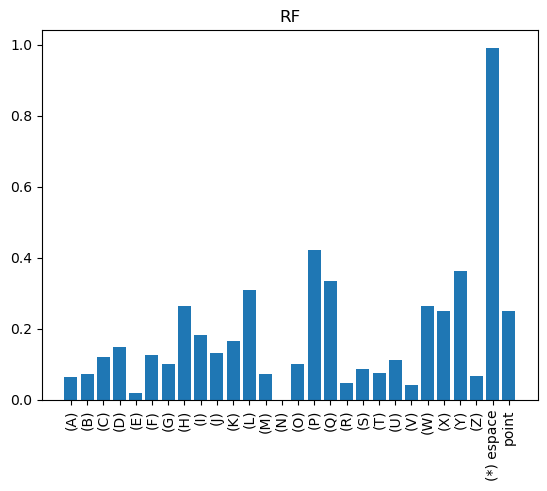

{"(1, '(A)')": 0.06382978723404255,
 "(2, '(B)')": 0.07142857142857142,
 "(3, '(C)')": 0.12,
 "(4, '(D)')": 0.15,
 "(5, '(E)')": 0.0196078431372549,
 "(6, '(F)')": 0.125,
 "(7, '(G)')": 0.1,
 "(8, '(H)')": 0.2631578947368421,
 "(9, '(I)')": 0.18181818181818182,
 "(10, '(J)')": 0.13043478260869565,
 "(11, '(K)')": 0.16666666666666666,
 "(12, '(L)')": 0.3076923076923077,
 "(13, '(M)')": 0.07142857142857142,
 "(14, '(N)')": 0.0,
 "(15, '(O)')": 0.1,
 "(16, '(P)')": 0.42105263157894735,
 "(17, '(Q)')": 0.3333333333333333,
 "(18, '(R)')": 0.047619047619047616,
 "(19, '(S)')": 0.08695652173913043,
 "(20, '(T)')": 0.07407407407407407,
 "(21, '(U)')": 0.11320754716981132,
 "(22, '(V)')": 0.041666666666666664,
 "(23, '(W)')": 0.2631578947368421,
 "(24, '(X)')": 0.25,
 "(25, '(Y)')": 0.36363636363636365,
 "(26, '(Z)')": 0.06666666666666667,
 "(27, '(*) espace')": 0.991044776119403,
 "(28, 'point')": 0.25}

In [23]:
testModelForEachCat(rf_resample, all_categories, y_test_not_resampled, X_test_not_resampled, title="RF", plot=False)

---  Cross Validation : Optimisation des hyperparamètres avec GridCV --- 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=  27.9s
[CV] END ....................................C=1, kernel=rbf; total time=14.7min
[CV] END ....................................C=1, kernel=rbf; total time=  31.9s
[CV] END ....................................C=1, kernel=rbf; total time=  30.8s
[CV] END ....................................C=1, kernel=rbf; total time=  30.9s
[CV] END ...................................C=1, kernel=poly; total time=  12.5s
[CV] END ...................................C=1, kernel=poly; total time=  13.0s
[CV] END ...................................C=1, kernel=poly; total time=  13.1s
[CV] END ...................................C=1, kernel=poly; total time=  13.7s
[CV] END ...................................C=1, kernel=poly; total time=  13.3s
[CV] END ................................C=1, kernel=sig

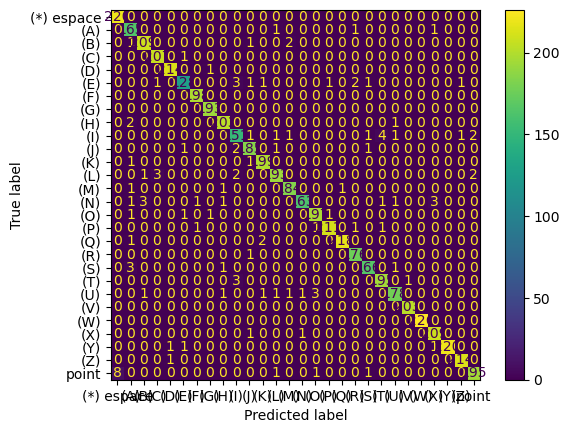

 Score Accuracy pour le meilleur modèle 
0.9799312963297776
0.4537487828627069


In [18]:
svc_resample =  SVC_Model(x_train_resampled, y_train_resampled, nbreCV = 5 , C_min=1,nb_C =2)

predictions_not_resample_svc = svc_resample.predict(X_test_not_resampled)   

accuracy_not_resample_svc = accuracy_score(y_test_not_resampled, predictions_not_resample_svc)

print(accuracy_not_resample_svc)

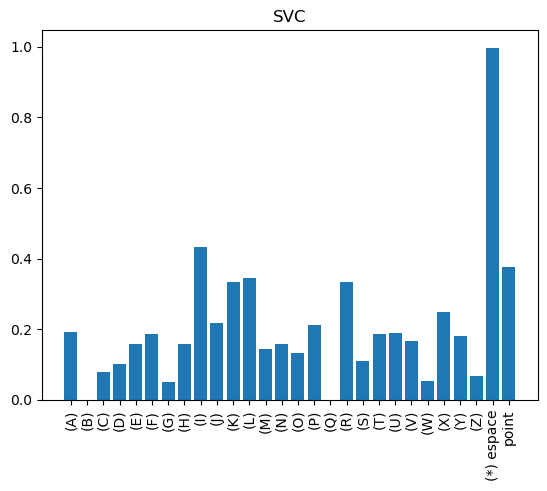

{"(1, '(A)')": 0.19148936170212766,
 "(2, '(B)')": 0.0,
 "(3, '(C)')": 0.08,
 "(4, '(D)')": 0.1,
 "(5, '(E)')": 0.1568627450980392,
 "(6, '(F)')": 0.1875,
 "(7, '(G)')": 0.05,
 "(8, '(H)')": 0.15789473684210525,
 "(9, '(I)')": 0.4318181818181818,
 "(10, '(J)')": 0.21739130434782608,
 "(11, '(K)')": 0.3333333333333333,
 "(12, '(L)')": 0.34615384615384615,
 "(13, '(M)')": 0.14285714285714285,
 "(14, '(N)')": 0.15789473684210525,
 "(15, '(O)')": 0.13333333333333333,
 "(16, '(P)')": 0.21052631578947367,
 "(17, '(Q)')": 0.0,
 "(18, '(R)')": 0.3333333333333333,
 "(19, '(S)')": 0.10869565217391304,
 "(20, '(T)')": 0.18518518518518517,
 "(21, '(U)')": 0.18867924528301888,
 "(22, '(V)')": 0.16666666666666666,
 "(23, '(W)')": 0.05263157894736842,
 "(24, '(X)')": 0.25,
 "(25, '(Y)')": 0.18181818181818182,
 "(26, '(Z)')": 0.06666666666666667,
 "(27, '(*) espace')": 0.9970149253731343,
 "(28, 'point')": 0.375}

In [25]:
testModelForEachCat(svc_resample, all_categories, y_test_not_resampled, X_test_not_resampled, title="SVC", plot=False)

Pour les trois modèles, on peut constater que l'accuracy est moins bonnes avec un data test non ressamplé, ce qui nous semble logique. 

# Deep Learning

## Sur le dataset complet 


In [19]:
NN_Model(X_train_all, X_test_all, y_train_all, y_test_all)

NameError: name 'NN_Model' is not defined


- The validation accuracy is : [0.46915584802627563] 

- The training accuracy is : [0.43182727694511414]

- The validation loss is : [1.8632093667984009]

- The training loss is : [3.420698881149292]

Classification error:  53.08 %



## Sur le dataset resampled 



In [ ]:
NN_Model(x_resampled, X_test_all, y_resampled, y_test_all)

- The validation accuracy is : [0.5689935088157654]
- The training accuracy is : [0.1520247608423233]
- The validation loss is : [1.5406628847122192]
- The training loss is : [2.8868353366851807]

Classification error:  43.1 %


In [ ]:
NN_Model(x_resampled_cut_space, X_test_all, y_resampled_cut_space, y_test_all)


- The validation accuracy is : [0.4642857015132904]
- The training accuracy is : [0.07636450976133347]
- The validation loss is : [1.9020476341247559]
- The training loss is : [3.236750841140747]
- Classification error:  53.57 %


In [ ]:
NN_Model(x_train_resampled, X_test_not_resampled, y_train_resampled, y_test_not_resampled)

Résultats varient, mais valeurs proches de :
- The validation accuracy is : [0.4654332995414734]
- The training accuracy is : [0.1752208173274994]
- The validation loss is : [1.855034351348877]
- The training loss is : [3.082515239715576]
- Classification error:  53.46 %

In [ ]:
index_label = [6,41,3,33,7,4,18,3,1,3,18,4,1,68,65,4,2,34,3,33,15,18,10,33,18,8]
X_test_ordonnated = [X_test_not_resampled[i] for i in index_label]
#X_test_ordonnated = X_test_not_resampled[1:300]
def from_pred_to_text (X_test_ordonnated):
    pred_X_test_ordonnated = best_svc_model_resample.predict(X_test_ordonnated) 
    sentence = []
    for i in range(len(pred_X_test_ordonnated)):
        if len(pred_X_test_ordonnated[i])==3:
            letter = pred_X_test_ordonnated[i][1]
        elif len(pred_X_test_ordonnated[i]) == 10:
            letter = " "
        else :
            letter = "."
        sentence.append(letter)
    # Renvoie la phrase dans un fichier texte 
    with open('sentence.txt', 'a') as f:
        f.write(''.join(sentence))

from_pred_to_text(X_test_ordonnated)